<a href="https://colab.research.google.com/github/ummeasalma/Big-Data/blob/main/embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this programming assignment, we will classifiy IMDB reviews into positive and negative reviews.
### We will download the raw IMDB reviews in text format. To convert the words into tensors, we use word embeddings.
### We will first use one of the pre-trained GloVe word embeddings. And then try to improve the embedding.
### To evaluate wether one embedding is better than the other, we use a list of positive words, and a list of negative words. We check how the positive words and negative words are spread in an embedding.  Idealy, we want all the positive words to be very close, and all the negative words to be very close in the embedding space, while positive words and negative words be far away from each other. We will define a function to measure how good an embedding is to sperate positive and negative words.
### Using this function, we evaluate the following three embebeddings.
- The glove embedding
- The dense embedding: we use the glove embedding as the initial embbedding and jointly train the embedding and the calssifier using a dense network. We call the resultant embedding the dense embedding.
- The LSTM embedding: we use the glove embedding as the initial embedding and jontly train the embedding and the classifier using a LSTM model. We call the resultant embedding the LSTM embedding.

### From the above three candidates, we choose the best embedding and stack a LSTM layer and a Conv1D layer to build our classifier. We use the dropout to fight overfitting. Our goal is to obtain a classifier that can achieve 90% of accuracy.

### Note we only need to fill in part of the code. But we do need to run all the code and generate your own results. Our results could be different from the ones shown in this file.

### For grading this assignment, each coding block we fill in will receive different corresponding point, as shown later. All the points add up to 100.

# Data preparation

Before we start, we need to make a folder named hw7 in Google drive and upload the following files under the folder.


*   aclImdb_v1.tar.gz
*   glove.6B.zip
*   positive.txt
*   negative.txt





Next, we mount Google drive, copy these files to local, and uncompress the compressed files using the following commands.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -zxvf /content/drive/My\ Drive/hw7/aclImdb_v1.tar.gz
#tar -zxvf /content/drive/MyDrive/hw7/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
!unzip /content/drive/My\ Drive/hw7/glove.6B.zip

Archive:  /content/drive/My Drive/hw7/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
!cp /content/drive/My\ Drive/hw7/positive.txt .
!cp /content/drive/My\ Drive/hw7/negative.txt .

### Read a list of positive words from a file, and read a list of negative words from another file.

In [5]:
filepath = 'positive.txt'
L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

In [6]:
filepath = 'negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

# Using word embeddings

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction).
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve.
These are called "pre-trained word embeddings".

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of
such a noisy, unstructured embedding space.

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words.
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the
embedding space to be meaningful.

In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings".
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in
Keras, we will start from scratch, by downloading the original text data.

### Process IMDB data as raw text

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels
(positive / negative) into a `labels` list:

In [7]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
texts[:2]

['This is the least scary film i have ever seen. How the blob manages to eat anyone is the biggest mystery of the film. The blob moves so slowly that an o.a.p in a zimmerframe could escape it. The blob has a large slice of luck coming across a typical horror film woman who instead of running away stands still for half an hour so that she can be eaten. If you havent seen this film i recommend you do, its far too funny to be taken seriously.',
 'I was not expecting much going in to this, but still came away disappointed. This was my least favorite Halestorm production I have seen. I thought it was supposed to be a comedy, but I only snickered at 3 or 4 jokes. Is it really a funny gag to see a fat guy eating donuts and falling down over and over? What was up with the janitor in Heaven scene? Fred Willard has been hilarious with some of his Christopher Guest collaborations, but this did not work. They must have spent all the budget on getting "known" actors to appear in this because there 

In [9]:
labels[:2]

[0, 0]

In [10]:
len(labels)

25000

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 600  # We will cut reviews after 600 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 600)
Shape of label tensor: (25000,)


In [12]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [13]:
data.shape

(25000, 600)

### Pre-process the GloVe embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number
vectors).

In [62]:
glove_dir = '.'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words,
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [63]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

Obtain L_POS:
* the list of postive words, where each word is in the embedding, word_index and whose word index is no more than max_word.

Obtain L_NEG:
* the list of negative words, where each word is in the embedding, word_index and whose word index is no more than max_word.

In [64]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] < max_words:
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] < max_words:
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(707, 1158)

Print the top 100 most frequently used positive words from L_POS that are both in the embedding and among the 10,000 most frequently used words. (10 points)

In [17]:
# # Create a dictionary to count the frequency of each word
# word_freq = {}
# for text in texts:
#     for word in text.split():
#         if word in word_freq:
#             word_freq[word] += 1
#         else:
#             word_freq[word] = 1

# # Filter out the words that are not in L_POS or L_NEG
# pos_freq = {word: freq for word, freq in word_freq.items() if word in L_POS}
# neg_freq = {word: freq for word, freq in word_freq.items() if word in L_NEG}

# # Sort the words by their frequency
# sorted_pos = sorted(pos_freq.items(), key=lambda x: x[1], reverse=True)
# sorted_neg = sorted(neg_freq.items(), key=lambda x: x[1], reverse=True)


In [65]:
# fill in your code here
P = [word for word, freq in sorted_pos[:100]]
print(P)

['like', 'good', 'great', 'well', 'best', 'love', 'better', 'pretty', 'work', 'enough', 'interesting', 'right', 'worth', 'fun', 'beautiful', 'nice', 'recommend', 'excellent', 'enjoy', 'liked', 'wonderful', 'loved', 'classic', 'top', 'enjoyed', 'perfect', 'lead', 'favorite', 'fine', 'works', 'decent', 'entertaining', 'fans', 'amazing', 'wonder', 'strong', 'supporting', 'humor', 'brilliant', 'clearly', 'important', 'modern', 'romantic', 'greatest', 'famous', 'happy', 'easy', 'clear', 'leads', 'talent', 'enjoyable', 'cool', 'leading', 'incredibly', 'hero', 'fairly', 'hilarious', 'worked', 'fantastic', 'fast', 'realistic', 'talented', 'perfectly', 'memorable', 'powerful', 'pure', 'appreciate', 'popular', 'positive', 'superb', 'free', 'rich', 'believable', 'likes', 'successful', 'won', 'glad', 'beauty', 'solid', 'hot', 'intelligent', 'convincing', 'win', 'effective', 'clever', 'incredible', 'success', 'cute', 'exciting', 'respect', 'amusing', 'tough', 'impressive', 'beautifully', 'appeal', 

Print the top 100 most frequently used negative words from L_NEG that are both in the embedding and among the 10,000 most frequently used words. (10 points)

In [ ]:
# prompt: rint the top 100 most frequently used negative words from L_NEG that are both in the embedding and among the 10,000 most frequently used words.

N = [word for word, freq in sorted_neg[:100]]
print(N)


In [66]:
# fill in your code here
N = [word for word, freq in sorted_neg[:100]]
print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'waste', 'problem', 'lost', 'stupid', 'death', 'lack', 'terrible', 'boring', 'kill', 'wrong', 'awful', 'evil', 'dead', 'worse', 'killer', 'killed', 'dark', 'falls', 'horrible', 'slow', 'fall', 'strange', 'sad', 'cheap', 'annoying', 'murder', 'hate', 'difficult', 'poorly', 'doubt', 'silly', 'problems', 'killing', 'ridiculous', 'hell', 'scary', 'weak', 'crap', 'fails', 'badly', 'crime', 'dull', 'disappointed', 'weird', 'kills', 'lame', 'creepy', 'cheesy', 'wasted', 'miss', 'mystery', 'break', 'missed', 'utterly', 'sorry', 'odd', 'crazy', 'dumb', 'zombie', 'bored', 'shame', 'bizarre', 'twist', 'failed', 'monster', 'impossible', 'violent', 'trouble', 'excuse', 'tension', 'lacks', 'died', 'unfortunately', 'die', 'fake', 'joke', 'falling', 'pointless', 'mess', 'sick', 'fell', 'mysterious', 'complex', 'disturbing', 'tired', 'revenge', 'fear', 'stuck', 'slowly', 'painful', 'negative', 'twists', 'prison', 'issues']


### Define a model and load the GloVe embeddings in the model

We will be using the model architecture shown below.

In [20]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

### Train and evaluate

Let's compile our model and train it:

In [21]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 4s 4ms/step - loss: 0.6388 - acc: 0.6677 - val_loss: 0.5688 - val_acc: 0.7520
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4436 - acc: 0.8115 - val_loss: 0.5578 - val_acc: 0.7578
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2678 - acc: 0.8935 - val_loss: 0.6681 - val_acc: 0.7486
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1483 - acc: 0.9414 - val_loss: 0.7374 - val_acc: 0.7610
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0814 - acc: 0.9717 - val_loss: 1.2259 - val_acc: 0.7216
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0446 - acc: 0.9844 - val_loss: 1.2244 - val_acc: 0.7484
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0326 - acc: 0.9879 - val_loss: 1.3264 - val_acc: 0.7420
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

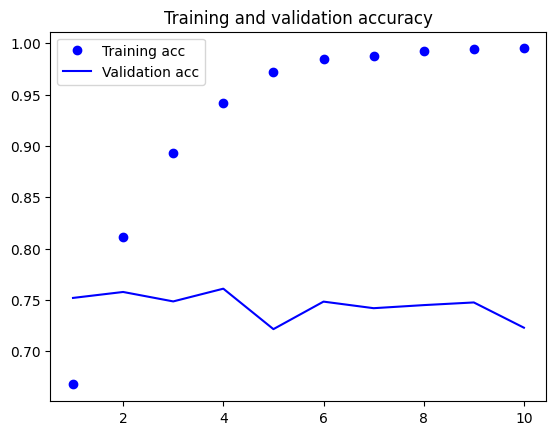

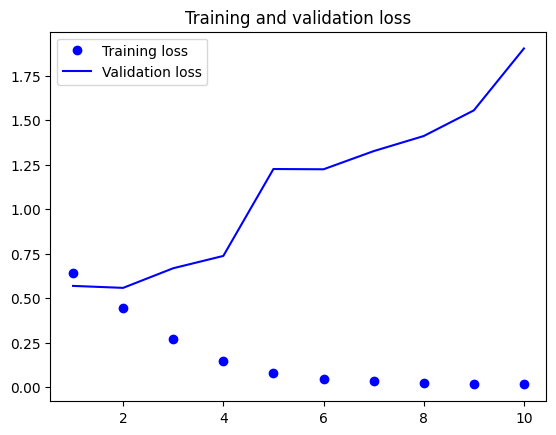

In [23]:
plot_history(history)

Now train the embedding and the dense layers jointly.

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 41s 64ms/step - loss: 0.6351 - acc: 0.6769 - val_loss: 0.5268 - val_acc: 0.7860
Epoch 2/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3783 - acc: 0.8428 - val_loss: 0.4299 - val_acc: 0.8104
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.1432 - acc: 0.9490 - val_loss: 0.4991 - val_acc: 0.8120
Epoch 4/10
625/625 [==============================] - 8s 12ms/step - loss: 0.0452 - acc: 0.9854 - val_loss: 0.6577 - val_acc: 0.8160
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0142 - acc: 0.9949 - val_loss: 0.8074 - val_acc: 0.8180
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0048 - acc: 0.9980 - val_loss: 1.0085 - val_acc: 0.8092
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0011 - acc: 0.9997 - val_loss: 1.2005 - val_acc: 0.8106
Epoch 8/10
625/625 [==============================] - 4s 7ms/step - l

Let's plot its performance over time:

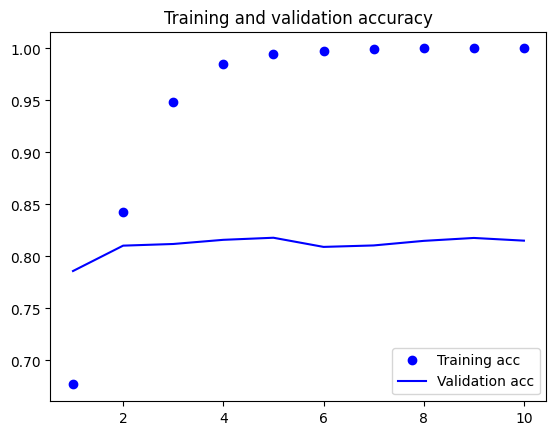

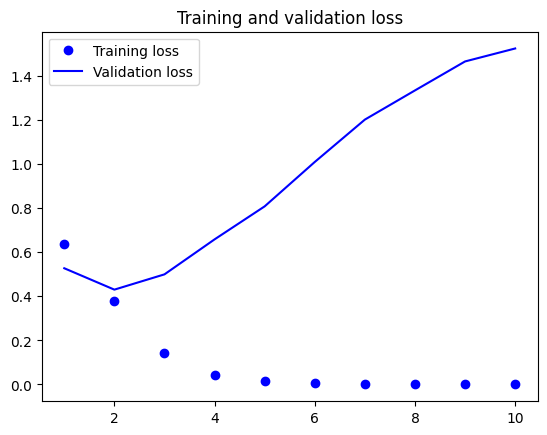

In [25]:
plot_history(history)

In [26]:
embedding_matrix1 = model.layers[0].get_weights()[0]

Now we train the embedding and the LSTM layers jointly.

In [27]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 37s 57ms/step - loss: 0.4724 - acc: 0.7732 - val_loss: 0.3420 - val_acc: 0.8604
Epoch 2/10
625/625 [==============================] - 21s 33ms/step - loss: 0.3053 - acc: 0.8760 - val_loss: 0.2909 - val_acc: 0.8818
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2369 - acc: 0.9066 - val_loss: 0.2663 - val_acc: 0.8940
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.1928 - acc: 0.9278 - val_loss: 0.2631 - val_acc: 0.8932
Epoch 5/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1522 - acc: 0.9446 - val_loss: 0.2807 - val_acc: 0.8868
Epoch 6/10
625/625 [==============================] - 14s 22ms/step - loss: 0.1170 - acc: 0.9610 - val_loss: 0.2941 - val_acc: 0.8952
Epoch 7/10
625/625 [==============================] - 14s 23ms/step - loss: 0.0865 - acc: 0.9714 - val_loss: 0.3523 - val_acc: 0.8958
Epoch 8/10
625/625 [==============================] - 13s 20ms

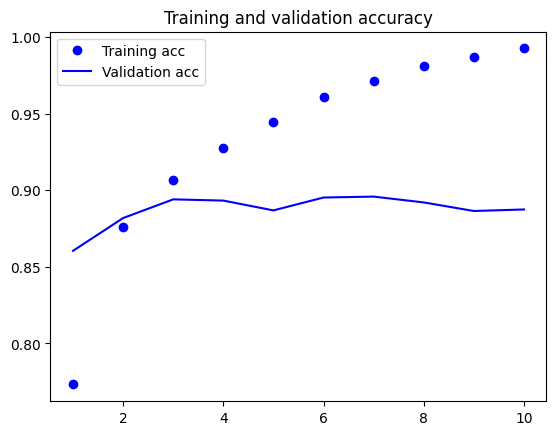

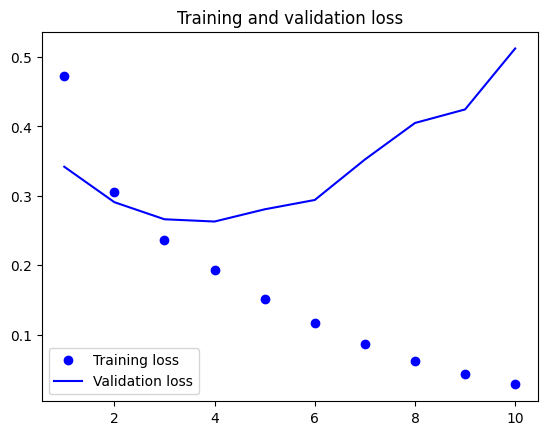

In [30]:
plot_history(history)

In [31]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [30]:
embedding_matrix2.shape

(10000, 300)

Implement the following three functions that measure the distance between words in the three different embeddings. (20 points)

In [31]:
# import numpy as np

# def word_dist(word1, word2, embedding_matrix):
#     if word1 not in word_index or word2 not in word_index:
#         return None
#     idx1 = word_index[word1]
#     idx2 = word_index[word2]
#     vec1 = embedding_matrix[idx1]
#     vec2 = embedding_matrix[idx2]
#     # Compute cosine similarity
#     similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
#     # Compute distance
#     distance = 1 - similarity
#     return distance

In [53]:
from scipy.spatial.distance import cosine
import numpy as np

def word_dist(word1, word2, embedding_matrix):
    # Get the index of the words
    idx1 = word_index[word1]
    idx2 = word_index[word2]

    # Get the embeddings of the words
    embed1 = embedding_matrix[idx1]
    embed2 = embedding_matrix[idx2]

    # Calculate the Euclidean distance between the embeddings
    dist = np.linalg.norm(embed1 - embed2)

    # Calculate the cosine distance between the embeddings
    # dist = cosine(embed1, embed2)

    return dist

def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

In [33]:
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

# def word_dist(word1, word2, embedding_matrix):
#     # Get the embedding vectors for the given words
#     embedding1 = embedding_matrix[word1] if word1 in embedding_matrix else None
#     embedding2 = embedding_matrix[word2] if word2 in embedding_matrix else None

#     if embedding1 is None or embedding2 is None:
#         return None  # One or both words not found in the embedding matrix

#     # Calculate the distance (e.g., cosine similarity or Euclidean distance)
#     # You can choose either cosine similarity or Euclidean distance based on your preference
#     # Example using cosine similarity:
#     #similarity = cosine_similarity([embedding1], [embedding2])[0][0]
#     #distance = 1 - similarity

#     # Alternatively, you can use Euclidean distance:
#     # distance = np.linalg.norm(embedding1 - embedding2)

#     return distance

# def dist_glove(word1, word2):
#     return word_dist(word1, word2, embedding_matrix)

# def dist_dense(word1, word2):
#     return word_dist(word1, word2, embedding_matrix1)

# def dist_LSTM(word1, word2):
#     return word_dist(word1, word2, embedding_matrix2)

Observe the following reults and check whether dense embedding and LSTM embedding are better than the glove embedding on these results.

In [33]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
True
True


In [34]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
True


In [35]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [36]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

False
False
False


Find the nearest neighhor of a word for the three embeddings. (20 points)

In [54]:
def NN_general(word, embedding_matrix):
    # Get the index of the word
    idx = word_index[word]

    # Get the embedding of the word
    embed = embedding_matrix[idx]

    # Initialize the minimum distance to a large number
    min_dist = float('inf')

    # Initialize the nearest neighbor to None
    nearest_neighbor = None

    # Iterate over all the words in the vocabulary
    for i in range(1, max_words):  # We start from 1 because 0 is a placeholder
        if i != idx:  # Skip calculating distance with the word itself
            # Calculate the Euclidean distance between the embeddings
            dist = np.linalg.norm(embed - embedding_matrix[i])

            # If the distance is smaller than the current minimum distance
            if dist < min_dist:
                # Update the minimum distance
                min_dist = dist

                # Update the nearest neighbor
                nearest_neighbor = i

    # Return the word that corresponds to the nearest neighbor
    return [k for k, v in word_index.items() if v == nearest_neighbor][0]




# def NN_general(word, embedding_matrix):
#     # Get the index of the word
#     idx = word_index[word]

#     # Get the embedding of the word
#     embed = embedding_matrix[idx]

#     # Initialize the minimum distance to a large number
#     min_dist = float('inf')

#     # Initialize the nearest neighbor to None
#     nearest_neighbor = None

#     # Iterate over all the words in the vocabulary
#     for i in range(embedding_matrix.shape[0]):
#         if i != idx:  # Skip calculating distance with the word itself
#             # Calculate the Euclidean distance between the embeddings
#             dist = np.linalg.norm(embed - embedding_matrix[i])

#             # If the distance is smaller than the current minimum distance
#             if dist < min_dist:
#                 # Update the minimum distance
#                 min_dist = dist

#                 # Update the nearest neighbor
#                 nearest_neighbor = i

#     # Return the word that corresponds to the nearest neighbor

#     return [k for k, v in word_index.items() if v == nearest_neighbor][0]
#     # if nearest_neighbor is not None:
#     #     return [k for k, v in word_index.items() if v == nearest_neighbor][0]
#     # else:
#     #     return None



# # def NN_general(word, embedding_matrix):
# #     # Get the index of the word
# #     idx = word_index.get(word)
# #     if idx is None:
# #         return None

# #     # Get the embedding of the word
# #     embed = embedding_matrix[idx]

# #     # Initialize the minimum distance to a large number
# #     min_dist = float('inf')

# #     # Initialize the nearest neighbor to None
# #     nearest_neighbor = None

# #     # Iterate over all the words in the vocabulary
# #     for i in range(1, max_words):  # We start from 1 because 0 is a placeholder
# #         # Calculate the cosine distance between the embeddings
# #         dist = cosine(embed, embedding_matrix[i])

# #         # If the distance is smaller than the current minimum distance
# #         if dist < min_dist:
# #             # Update the minimum distance
# #             min_dist = dist

# #             # Update the nearest neighbor
# #             nearest_neighbor = i

# #     # Return the word that corresponds to the nearest neighbor
# #     return [k for k, v in word_index.items() if v == nearest_neighbor][0]


In [55]:
# def NN_general(word, embedding_matrix):
#     # Get the embedding vector for the given word
#     word_embedding = embedding_matrix.get(word, None)
#     if word_embedding is None:
#         return None  # Word not found in the embedding matrix

#     # Calculate Euclidean distances between the word and all other embeddings
#     distances = np.linalg.norm(list(embedding_matrix.values()) - word_embedding, axis=1)

#     # Sort indices based on distance (lower distance means closer neighbors)
#     sorted_indices = np.argsort(distances)

#     # Get the top 3 nearest neighbors (excluding the word itself)
#     nearest_neighbors = [list(embedding_matrix.keys())[i] for i in sorted_indices[1:4]]

#     return nearest_neighbors

def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

List of all the words that the nearest neighbor changes in the LSTM embedding, while its nearest neighbor does not change in the dense embedding.

In [56]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: abundance hence furthermore
:::: accurately precisely correctly
:::: amusing comical hilarious
:::: angel it's gabriel
:::: assure ensure assured
:::: believable captivating likable
:::: bright shiny shine
:::: cheer cheers cheering
:::: clarity importantly subtlety
:::: convenient easier easy
:::: decency morality fairness
:::: elite don't ranks
:::: enough needed so
:::: entertains entertain entertained
:::: excellent superb good
:::: fascinating intriguing interesting
:::: interests particular concerned
:::: intricate elaborate complicated
:::: lover lovers boyfriend
:::: master won't taught
:::: miraculously luckily fortunately
:::: modest substantial albeit
:::: pleasantly surprised delightfully
:::: redemption haven't forgiveness
:::: relaxed relax relaxing
:::: renaissance medieval century
:::: safe secure sure
:::: super who's bowl
:::: thrilling enthralling riveting
:::: trusted importantly convinced
:::: upbeat optimistic downbeat
:::: willingly reluctantly gladly
:::: w

List of the words that its nearest neighbor changes in the dense embedding, while the nearest neighbor does not change in the LSTM embedding.

In [57]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: clear clearly yet
:::: comfortable quite easy
:::: commitment determination promise
:::: consistent importantly inconsistent
:::: effective means therefore
:::: excellently admirably superbly
:::: fantastically amazingly wonderfully
:::: free so giving
:::: fun entertaining stuff
:::: golden the it's
:::: greatest arguably great
:::: loyal faithful followers
:::: luck anyway unfortunately
:::: masterful mesmerizing superb
:::: passion desire love
:::: perfectly nicely fit
:::: poignant hilarious haunting
:::: powerful influential potent
:::: superb brilliant excellent
:::: wonder wondering wonders
:::: bad worse unfortunately
:::: betrays i've informs
:::: bitch can't slut
:::: drag what's it's
:::: drain couldn't excess
:::: estranged fiancée husband
:::: fat doesn't eat
:::: feeble couldn't weak
:::: fell slipped rose
:::: filthy doesn't disgusting
:::: foul didn't trouble
:::: freaks she's freak
:::: fuss doesn't bother
:::: hapless couldn't bumbling
:::: idiot idiots fool
::::

In [58]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: admirer it's 80's i'd
:::: better good actually even
:::: blessing it's today's one's
:::: bliss it's who's you're
:::: compliment it's movie's world's
:::: darling it's hasn't world's
:::: dashing it's she's won't
:::: destiny fate 50's it's
:::: earnest it's i've 
:::: elevate it's movie's 80's
:::: excels it's i've imho
:::: fiery it's i've won't
:::: fond remembered who's today's
:::: glee it's i'd 'the
:::: grace it's who's he's
:::: groundbreaking it's haven't you've
:::: gusto it's who's stewart's
:::: hale it's who's there's
:::: hallmark it's won't i'm
:::: handy it's she's can't
:::: hardy it's who's there's
:::: harmony it's you've who's
:::: humble it's i've today's
:::: jolly it's 70's 40's
:::: kindly it's she's 
:::: kudos it's i've shakespeare's
:::: lean it's you'll let's
:::: liked figured likes thought
:::: liking it's i've 
:::: mercy it's what's he's
:::: mighty it's 'the today's
:::: miracle indeed film's shouldn't
:::: notably especially particularly like

Get the list of words that dense embedding and LSTM embedding agree on the nearest neighbor but do not agree with the glove embedding.

In [43]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: available only addition addition
:::: bliss it's who's who's
:::: charisma lacks exudes exudes
:::: comfort indeed knowing knowing
:::: consistently nonetheless nevertheless nevertheless
:::: enjoys enjoyed enjoying enjoying
:::: entertaining amusing enjoyable enjoyable
:::: excellent good superb superb
:::: fantastic amazing incredible incredible
:::: fascinating interesting intriguing intriguing
:::: great good well well
:::: heroic hero heroes heroes
:::: luck unfortunately anyway anyway
:::: nice wonderful lovely lovely
:::: notably especially particularly particularly
:::: peaceful manner means means
:::: progress efforts noting noting
:::: rapid slow transformation transformation
:::: renaissance century medieval medieval
:::: sensational bizarre shocking shocking
:::: smarter happier funnier funnier
:::: standout it's haven't haven't
:::: understandable evidently importantly importantly
:::: wonder wonders wondering wondering
:::: anxious eager worried worried
:::: badly hu

Get the list of words that glove, dense, LSTM embeddings all agree on the nearest neighbor.

In [44]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound sorts sorts sorts
:::: accessible available available available
:::: acclaim garnered garnered garnered
:::: acclaimed renowned renowned renowned
:::: accomplish accomplished accomplished accomplished
:::: accomplished accomplish accomplish accomplish
:::: accomplishment achievement achievement achievement
:::: accurate precise precise precise
:::: achievement accomplishment accomplishment accomplishment
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admirably excellently excellently excellently
:::: admiration affection affection affection
:::: admire appreciate appreciate appreciate
:::: adorable cute cute cute
:::: adore despise despise despise
:::: advanced advance advance advance
:::: advantage giving giving giving
:::: adventurous inventive inventive inventive
:::: affection admiration admiration admiration
:::: afford anymore anymore anymore
:::: amazed thril

## Visualization of the three embeddings. We want to see how the positive words and negative words are spreaded in two dimensional space.

In [45]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [46]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [47]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1865, 300), (1865, 300), (1865, 300))

In [48]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

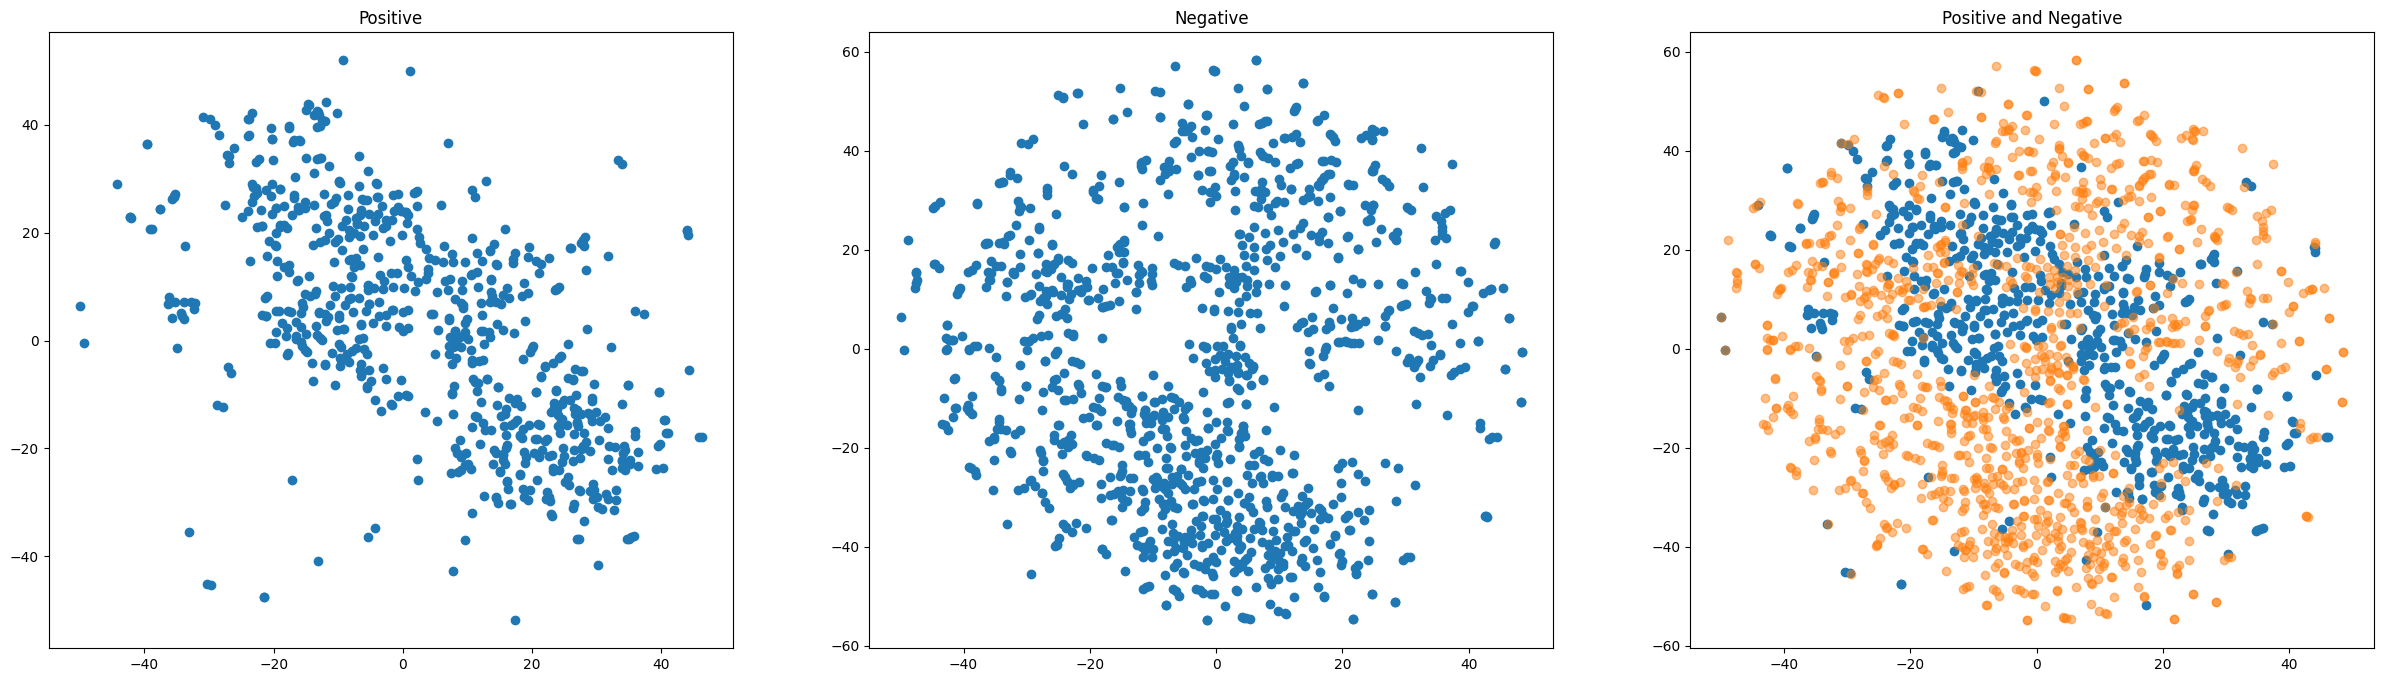

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [50]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

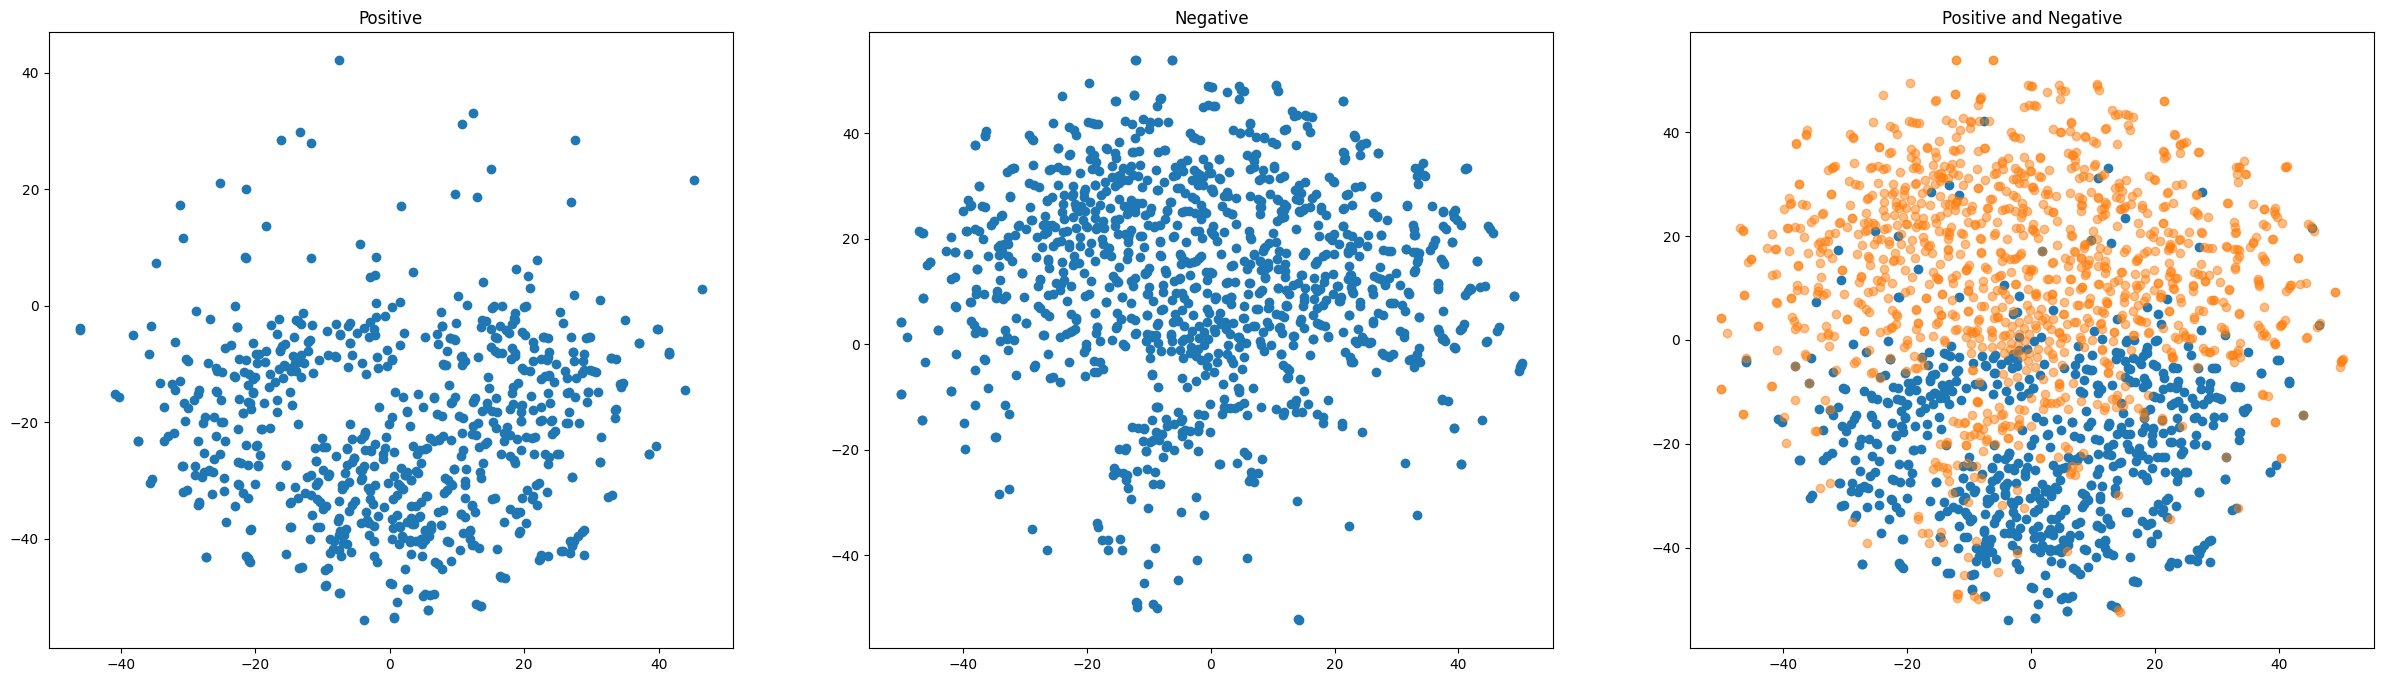

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [52]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

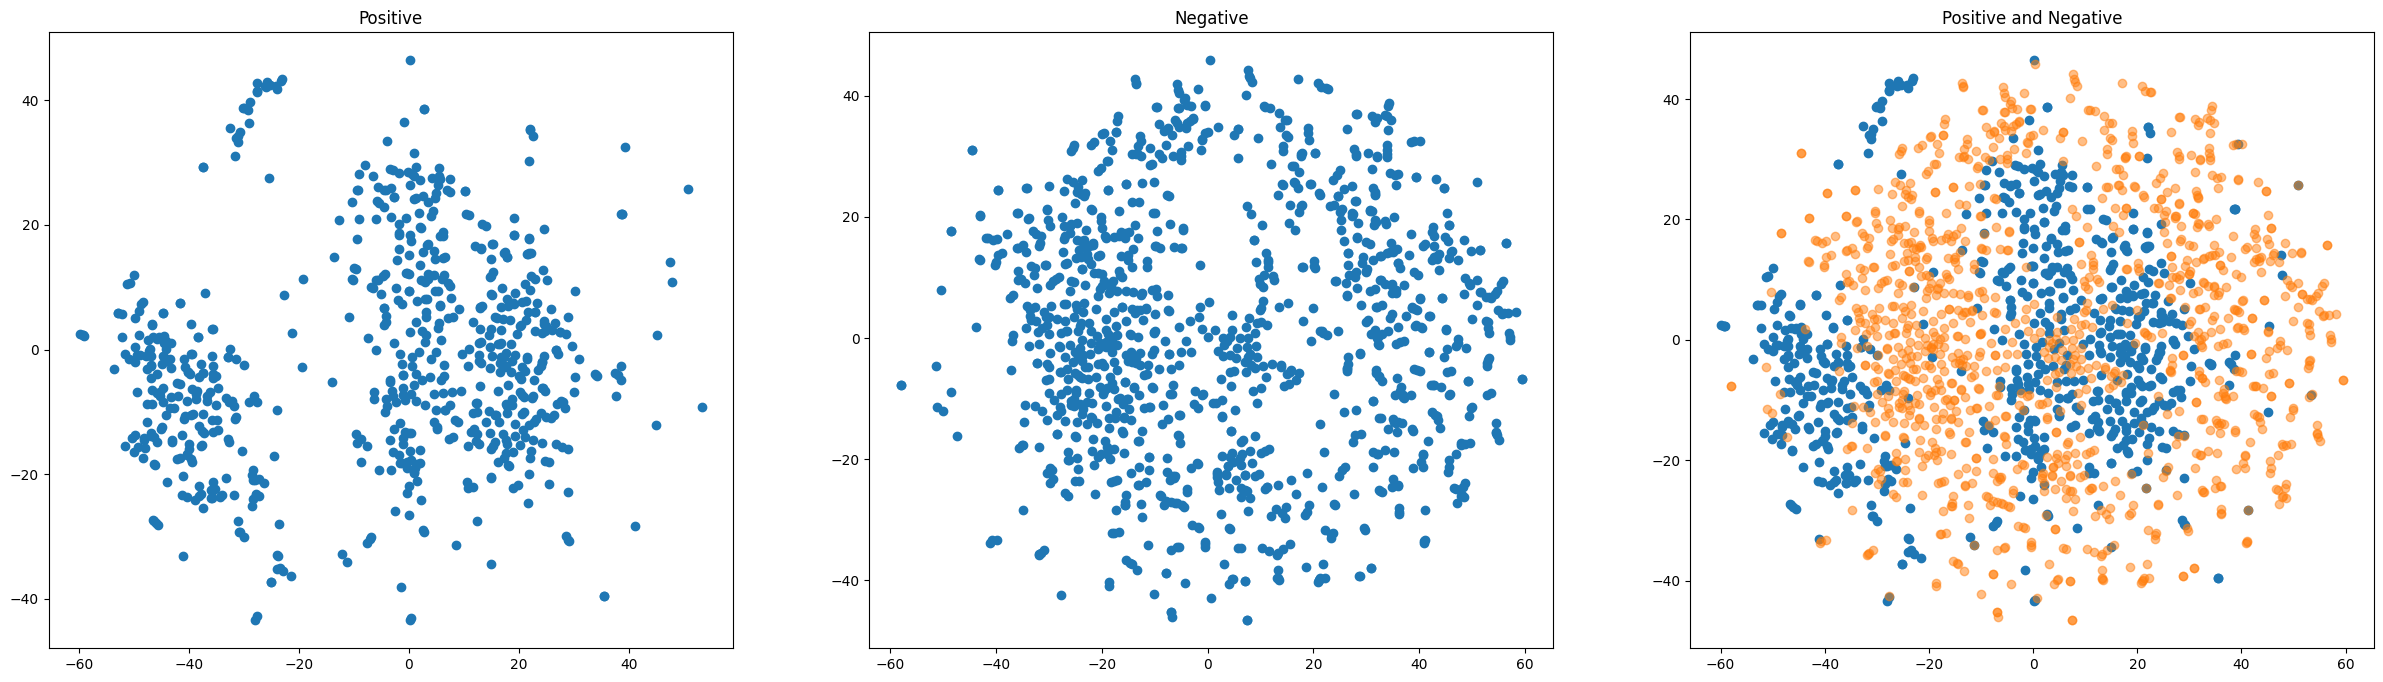

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

Next we implement the class distance function for the three embeddings. (40 points)

In [ ]:
# prompt: implement the class distance function for the three embeddings. def class_dist(L_POS, L_NEG, embedding_matrix):
# #     # fill in your code here
# #     # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
# #     # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
# #     # We return d12/d as the result

def class_dist(L_POS, L_NEG, embedding_matrix):
    # Initialize the distances
    d12 = 0
    d = 0
    # Calculate the average distance between a word in L_POS and a word in L_NEG
    for word1 in L_POS:
        for word2 in L_NEG:
            d12 += dist_general(word1, word2, embedding_matrix)
    d12 /= (len(L_POS) * len(L_NEG))

    # Calculate the average distance between two words in L_POS + L_NEG
    for word1 in L_POS + L_NEG:
        for word2 in L_POS + L_NEG:
            d += dist_general(word1, word2, embedding_matrix)
    d /= ((len(L_POS) + len(L_NEG)) ** 2)

    # Return the ratio of the two distances
    return d12 / d


In [55]:
# def class_dist(L_POS, L_NEG, embedding_matrix):
#     # fill in your code here
#     # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
#     # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
#     # We return d12/d as the result

#     # Calculate the average distance between a word in L_POS and a word in L_NEG
#     d12 = np.mean([np.linalg.norm(embedding_matrix[word1] - embedding_matrix[word2]) for word1 in L_POS for word2 in L_NEG])

#     # Calculate the average distance between two words in L_POS + L_NEG
#     all_words = L_POS + L_NEG
#     d = np.mean([np.linalg.norm(embedding_matrix[word1] - embedding_matrix[word2]) for word1 in all_words for word2 in all_words])

#     # Return d12/d as the result
#     return d12 / d

def class_dist(L_POS, L_NEG, embedding_matrix):
    # Calculate the average distance between a word in L_POS and a word in L_NEG
    d12 = np.mean([np.linalg.norm(embedding_matrix[word_index[word1]] - embedding_matrix[word_index[word2]]) for word1 in L_POS for word2 in L_NEG])

    # Calculate the average distance between two words in L_POS + L_NEG
    all_words = L_POS + L_NEG
    d = np.mean([np.linalg.norm(embedding_matrix[word_index[word1]] - embedding_matrix[word_index[word2]]) for word1 in all_words for word2 in all_words])

    # Return d12/d as the result
    return d12 / d


def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [56]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.0097626393768542 1.0109241 1.0100663
Relative improvments:
Dense: 0.11502321968626986
LSTM: 0.030069586609014497


Now we double check the chosen embedding is indeeded better. We use the chosen embedding and LSTM model and check whether the valdidation accuracy is better.

In [57]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 15s 21ms/step - loss: 0.3962 - acc: 0.8270 - val_loss: 0.3300 - val_acc: 0.8672
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3070 - acc: 0.8755 - val_loss: 0.3148 - val_acc: 0.8702
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2691 - acc: 0.8934 - val_loss: 0.3205 - val_acc: 0.8772
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2407 - acc: 0.9053 - val_loss: 0.2857 - val_acc: 0.8824
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2190 - acc: 0.9134 - val_loss: 0.3007 - val_acc: 0.8628
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 0.2021 - acc: 0.9197 - val_loss: 0.2776 - val_acc: 0.8794
Epoch 7/10
625/625 [==============================] - 11s 18ms/step - loss: 0.1878 - acc: 0.9264 - val_loss: 0.2811 - val_acc: 0.8908
Epoch 8/10
625/625 [==============================] - 12s 19ms

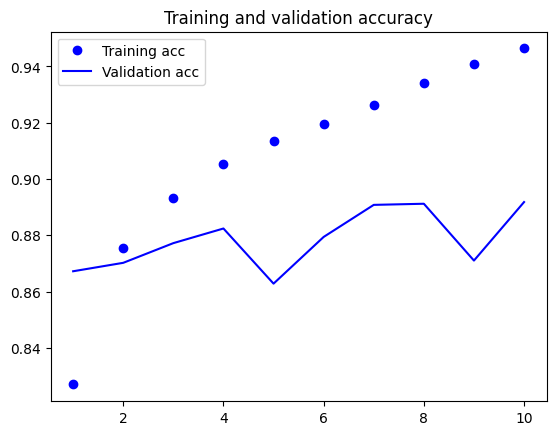

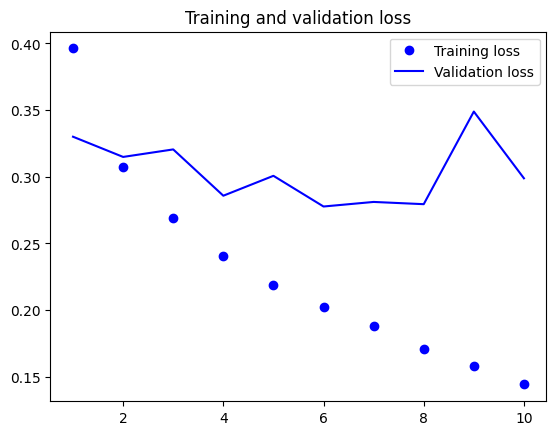

In [59]:
plot_history(history)

## Building a Y-network model

In this model, we have two inputs and one output. The Y-network uses the same input twice, both on the left and right convnets braches. The left and right branches have the same setup.

In [60]:
from keras import backend as K

K.clear_session()

In [61]:
import keras
from keras import layers
from keras import models

input_shape = (maxlen, )

left_inputs = layers.Input(shape=input_shape)

x = Embedding(max_words, embedding_dim, weights=[embedding_matrix1], trainable=False, input_length=maxlen)(left_inputs)

x = layers.Bidirectional(layers.LSTM(128, return_sequences = True))(x)

x = layers.Conv1D(64, 7, activation='relu')(x)

x = layers.GlobalMaxPool1D()(x)

right_inputs = layers.Input(shape=input_shape)

y = layers.Embedding(max_words, embedding_dim, weights=[embedding_matrix1], trainable=False, input_length=maxlen)(right_inputs)

y = layers.Bidirectional(LSTM(128, return_sequences = True))(y)

y = layers.Conv1D(64, 7, activation='relu')(y)

y = layers.GlobalMaxPool1D()(y)

x = layers.concatenate([x, y])
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = models.Model([left_inputs, right_inputs], outputs=outputs)


In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [63]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D.h5', monitor='val_loss', save_best_only=True,)]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - ETA: 0s - loss: 0.3199 - acc: 0.8608

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 72s 102ms/step - loss: 0.3199 - acc: 0.8608 - val_loss: 0.2715 - val_acc: 0.8886
Epoch 2/200
625/625 [==============================] - 63s 100ms/step - loss: 0.2333 - acc: 0.9075 - val_loss: 0.3017 - val_acc: 0.8792
Epoch 3/200
625/625 [==============================] - 64s 102ms/step - loss: 0.1974 - acc: 0.9226 - val_loss: 0.2769 - val_acc: 0.8876
Epoch 4/200
625/625 [==============================] - 63s 101ms/step - loss: 0.1495 - acc: 0.9439 - val_loss: 0.2587 - val_acc: 0.9004
Epoch 5/200
625/625 [==============================] - 63s 102ms/step - loss: 0.1108 - acc: 0.9578 - val_loss: 0.3245 - val_acc: 0.8972
Epoch 6/200
625/625 [==============================] - 63s 102ms/step - loss: 0.0689 - acc: 0.9756 - val_loss: 0.3928 - val_acc: 0.9008
Epoch 7/200
625/625 [==============================] - 63s 101ms/step - loss: 0.0432 - acc: 0.9854 - val_loss: 0.4403 - val_acc: 0.8976
Epoch 8/200
625/625 [==============================] - 63s 1

In [64]:
print(model.layers[3].name)

embedding_1


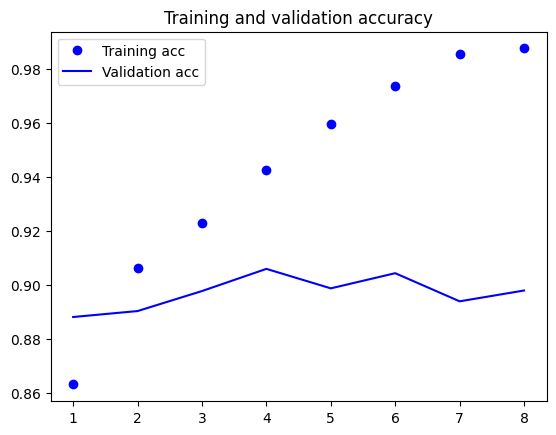

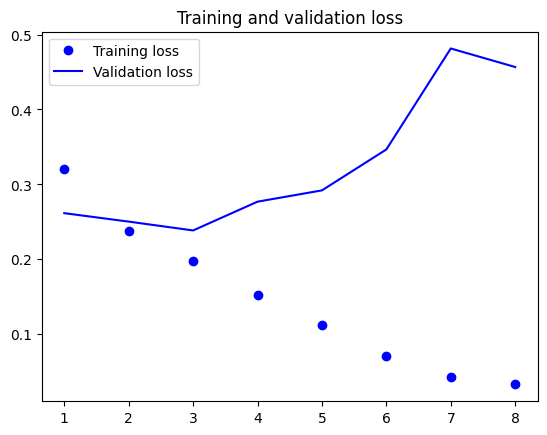

In [ ]:
plot_history(history)

Now we load the model and make the word embeddings on the left branch trainable.

In [65]:
model = keras.models.load_model('LSTM_Conv1D.h5')
for i in range(len(model.layers)):
    model.layers[i].trainable = False

model.layers[2].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [66]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain.h5', monitor='val_loss', save_best_only=True,)]


history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 109s 167ms/step - loss: 0.0876 - acc: 0.9732 - val_loss: 0.2599 - val_acc: 0.9024
Epoch 2/200
625/625 [==============================] - 69s 110ms/step - loss: 0.0502 - acc: 0.9886 - val_loss: 0.2690 - val_acc: 0.9066
Epoch 3/200
625/625 [==============================] - 57s 91ms/step - loss: 0.0310 - acc: 0.9952 - val_loss: 0.2824 - val_acc: 0.9032
Epoch 4/200
625/625 [==============================] - 52s 83ms/step - loss: 0.0199 - acc: 0.9977 - val_loss: 0.2898 - val_acc: 0.9056
Epoch 5/200
625/625 [==============================] - 53s 85ms/step - loss: 0.0135 - acc: 0.9989 - val_loss: 0.3041 - val_acc: 0.9040
Epoch 6/200
625/625 [==============================] - 50s 80ms/step - loss: 0.0097 - acc: 0.9994 - val_loss: 0.3179 - val_acc: 0.9030


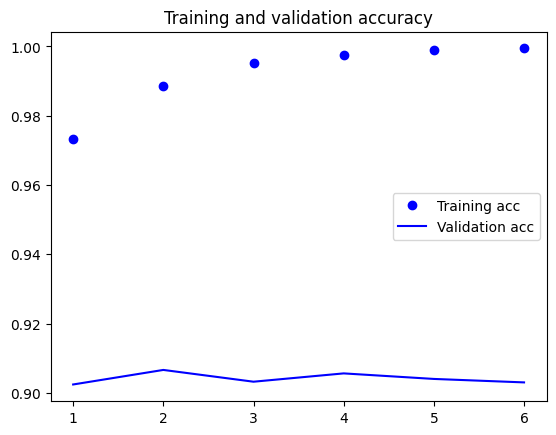

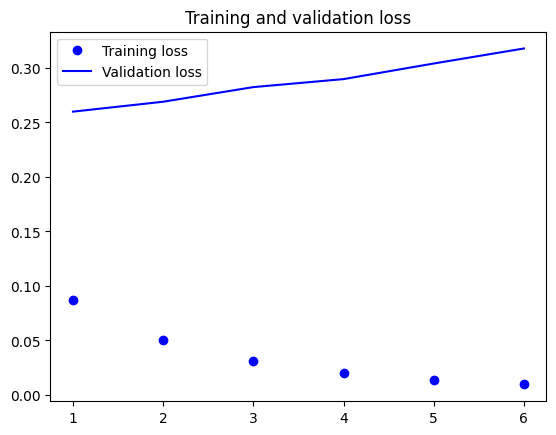

In [67]:
plot_history(history)

Now we load the model and make the embedding on the right branch trainable.

In [68]:
model = keras.models.load_model('LSTM_Conv1D_retrain.h5')
for i in range(len(model.layers)):
    model.layers[i].trainable = False

model.layers[3].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [69]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain_1.h5', monitor='val_loss', save_best_only=True,)]


history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 85s 129ms/step - loss: 0.0489 - acc: 0.9891 - val_loss: 0.2621 - val_acc: 0.9078
Epoch 2/200
625/625 [==============================] - 58s 93ms/step - loss: 0.0290 - acc: 0.9945 - val_loss: 0.2744 - val_acc: 0.9068
Epoch 3/200
625/625 [==============================] - 53s 85ms/step - loss: 0.0186 - acc: 0.9973 - val_loss: 0.2845 - val_acc: 0.9084
Epoch 4/200
625/625 [==============================] - 53s 84ms/step - loss: 0.0122 - acc: 0.9988 - val_loss: 0.2950 - val_acc: 0.9062
Epoch 5/200
625/625 [==============================] - 50s 80ms/step - loss: 0.0077 - acc: 0.9997 - val_loss: 0.3041 - val_acc: 0.9066
Epoch 6/200
625/625 [==============================] - 49s 78ms/step - loss: 0.0055 - acc: 0.9999 - val_loss: 0.3149 - val_acc: 0.9074


Now we load the best model. And then we evaluate the model using the test data.

In [70]:
model = keras.models.load_model('LSTM_Conv1D_retrain_1.h5')

In [71]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [72]:
model.evaluate([x_test, x_test], y_test)

782/782 [==============================] - 31s 38ms/step - loss: 0.2442 - acc: 0.9091


[0.2442195862531662, 0.9090800285339355]

We did beat the 90% of accuracy. Pay attention to the tecniques we used to achieve this goal. To save time, I only showed one model above. In fact, I tried many different models and optimizers. A few of these combinations should be able to beat 90% of accuracy. The above is the one I think is both promising and realtively simple.